<a href="https://colab.research.google.com/github/19PA1A04B9/-10-03-2020/blob/master/ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
print(data.columns)



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
print(data.groupby("Outcome").size())


Outcome
0    500
1    268
dtype: int64


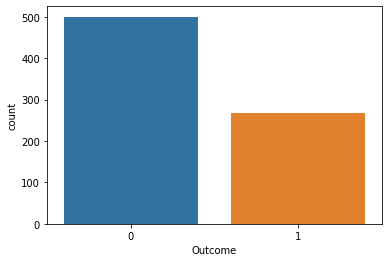

In [17]:
sns.countplot(data['Outcome'],label="Count")

DECISION TREE CLASSIFIER

In [0]:
#divide the data for training and test
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=66)

In [19]:
#apply Decision tree classifier on the given data to find the accuracy 
dc = DecisionTreeClassifier(max_depth=3, random_state=0)
dc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dc.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [20]:
#to find the importace of features 
print("Feature importances:\n{}".format(dc.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


NameError: ignored

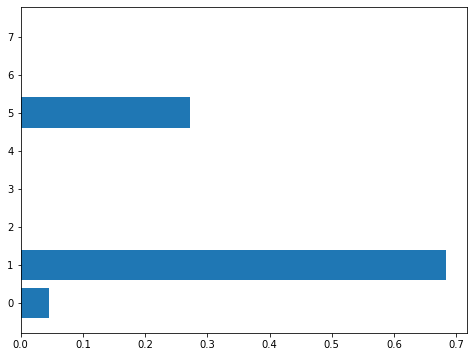

In [21]:
#to fing the most important feature
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dc)
plt.savefig('feature_importance')

RANDOM FOREST





In [0]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
#applying random forest for 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rf.score(X_test, y_test)))


Accuracy on training set: 1.00
Accuracy on test set: 0.79


NameError: ignored

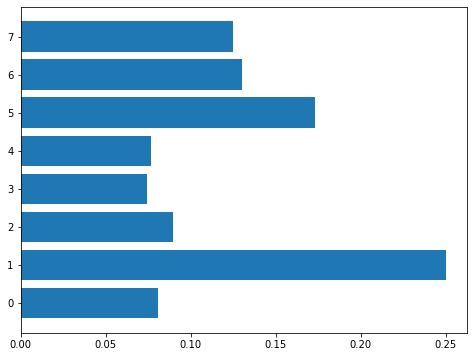

In [23]:
#feature importance
plot_feature_importances_diabetes(rf)

AdaBoostClassifier



In [24]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [0]:
#predictions of test data
predictions = classifier.predict(X_test)


In [26]:
confusion_matrix(y_test, predictions)


array([[106,  19],
       [ 21,  46]])

19PA1A04B9